In [1]:
import pandas as pd
df=pd.read_csv('E:\python practice\hate_speech_dataset.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
df.drop(columns=["Unnamed: 0","count","offensive_language","neither","class"],axis=1,inplace=True)

In [3]:
df['hate_speech'].replace({2:0,3:1,4:0,5:1,6:1,7:1},inplace=True)
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
df.head(90)

,hate_speech,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
86,0,"""@BrokenPiecesmsc: @ItsNotAdam faggot read my ..."
87,0,"""@BrosConfessions: This bitch was so ungratefu..."
88,0,"""@CASHandBOOBIES: I been kidnapped yo bitch"""


In [4]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^-9A-Za-z]', ' ', df['tweet'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)
 

[nltk_data] Downloading package stopwords to C:\Users\Amjad Net
[nltk_data]     Cafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
    
cv = CountVectorizer(max_features = 300)
x=cv.fit_transform(corpus).toarray()
#X = cv.fit_transform(corpus).toarray()
#xtrain_count.toarray()[:6]
#y=pd.get_dummies(df['hate_speech'])
#y = y.iloc[:,1].values

y=df['hate_speech']

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)

y_pred=clf.predict(xtest)
y_pred
clf.score(xtest,ytest)
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=672696423),
 DecisionTreeClassifier(max_features='auto', random_state=1491076806),
 DecisionTreeClassifier(max_features='auto', random_state=1819879634),
 DecisionTreeClassifier(max_features='auto', random_state=1538944875),
 DecisionTreeClassifier(max_features='auto', random_state=1484260525),
 DecisionTreeClassifier(max_features='auto', random_state=327379513),
 DecisionTreeClassifier(max_features='auto', random_state=764329720),
 DecisionTreeClassifier(max_features='auto', random_state=709421911),
 DecisionTreeClassifier(max_features='auto', random_state=2058345532),
 DecisionTreeClassifier(max_features='auto', random_state=17866594)]

In [8]:
from sklearn import metrics
metrics.accuracy_score(ytest, y_pred)

0.8223724026629009

[Text(543.9838610710915, 813.6869747899159, 'X[234] <= 0.5\ngini = 0.266\nsamples = 9353\nvalue = [12521, 2348]'),
 Text(530.9185383267248, 810.2609243697478, 'X[279] <= 0.5\ngini = 0.264\nsamples = 9268\nvalue = [12430, 2304]'),
 Text(512.750978383529, 806.8348739495798, 'X[176] <= 0.5\ngini = 0.259\nsamples = 9114\nvalue = [12274, 2214]'),
 Text(483.9035359504036, 803.4088235294117, 'X[22] <= 0.5\ngini = 0.227\nsamples = 8414\nvalue = [11603, 1742]'),
 Text(472.55897964604065, 799.9827731092437, 'X[184] <= 1.5\ngini = 0.231\nsamples = 8215\nvalue = [11282, 1735]'),
 Text(472.0835715537698, 796.5567226890756, 'X[178] <= 0.5\ngini = 0.231\nsamples = 8214\nvalue = [11282, 1734]'),
 Text(457.4169705021152, 793.1306722689076, 'X[224] <= 0.5\ngini = 0.224\nsamples = 8110\nvalue = [11193, 1648]'),
 Text(435.6308718636064, 789.7046218487395, 'X[197] <= 0.5\ngini = 0.223\nsamples = 8071\nvalue = [11144, 1631]'),
 Text(398.33926118057366, 786.2785714285714, 'X[293] <= 0.5\ngini = 0.23\nsamples

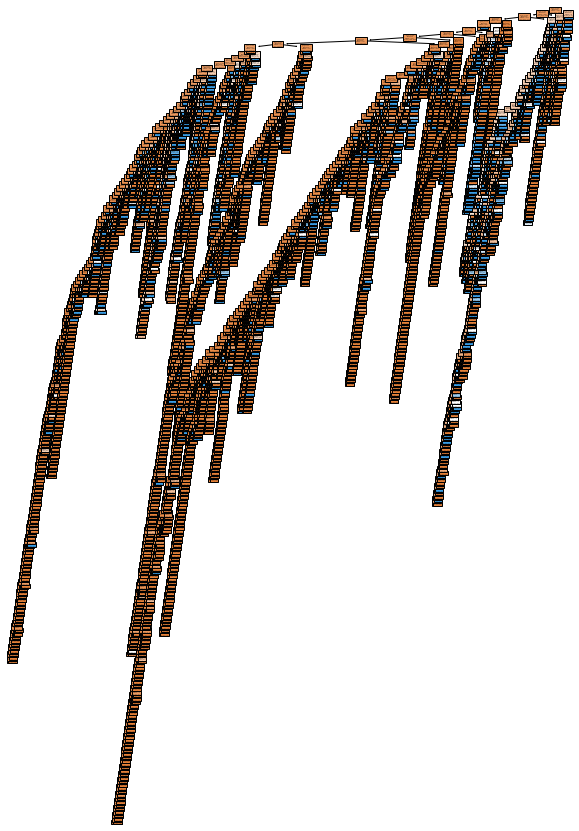

In [9]:
#Visualize the tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(clf.estimators_[1],filled=True)

[Text(257.21890006149687, 542.5820224719101, 'X[126] <= 0.5\ngini = 0.261\nsamples = 9373\nvalue = [12574, 2295]'),
 Text(236.83871060355094, 540.5460674157304, 'X[294] <= 1.5\ngini = 0.269\nsamples = 8210\nvalue = [10921, 2079]'),
 Text(236.65231271714057, 538.5101123595506, 'X[11] <= 0.5\ngini = 0.268\nsamples = 8207\nvalue = [10921, 2074]'),
 Text(228.75038230424045, 536.4741573033708, 'X[75] <= 0.5\ngini = 0.261\nsamples = 7738\nvalue = [10356, 1888]'),
 Text(226.2836179036355, 534.438202247191, 'X[204] <= 0.5\ngini = 0.257\nsamples = 7651\nvalue = [10279, 1832]'),
 Text(223.16746849492657, 532.4022471910113, 'X[178] <= 0.5\ngini = 0.252\nsamples = 7511\nvalue = [10135, 1760]'),
 Text(220.7097268773184, 530.3662921348315, 'X[279] <= 0.5\ngini = 0.246\nsamples = 7402\nvalue = [10036, 1683]'),
 Text(217.96111907162233, 528.3303370786517, 'X[239] <= 1.5\ngini = 0.242\nsamples = 7287\nvalue = [9904, 1625]'),
 Text(214.95697519096865, 526.294382022472, 'X[63] <= 1.5\ngini = 0.241\nsampl

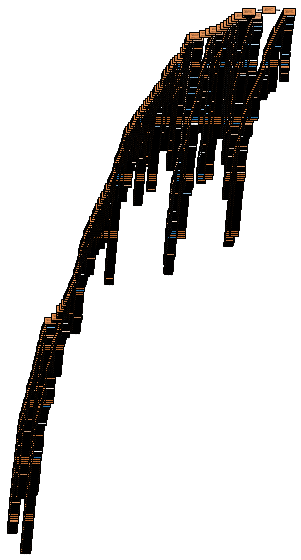

In [10]:
plt.figure(figsize=(5,10))
tree.plot_tree(clf.estimators_[0],filled=True)